   Experience_years  Salary_lpa
0               0.5         3.0
1               1.0         3.5
2               2.0         4.5
3               3.0         5.2
4               4.0         6.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience_years  11 non-null     float64
 1   Salary_lpa        11 non-null     float64
dtypes: float64(2)
memory usage: 308.0 bytes
None

Slope (m): 0.7623129251700681
Intercept (b): 2.8900680272108836

Actual vs Predicted:
Actual: 6.80, Predicted: 6.70
Actual: 3.00, Predicted: 3.27
Actual: 10.50, Predicted: 10.51

Mean Absolute Error: 0.1275963718820862
R2 Score: 0.9970343792256637

Predicted salary for 5 years experience: 6.70 LPA


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


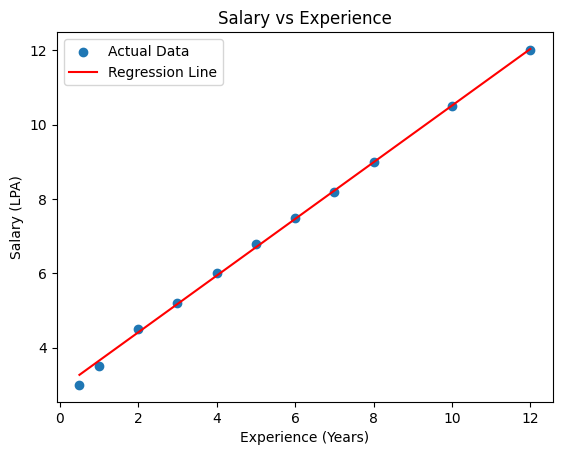

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Load dataset
df = pd.read_csv("/content/salary_lpa - Sheet1.csv")

print(df.head())
print(df.info())

# Step 3: Define features (X) and target (y)
X = df[["Experience_years"]]
y = df["Salary_lpa"]

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Model parameters
print("\nSlope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Step 7: Predict on test data
y_pred = model.predict(X_test)

print("\nActual vs Predicted:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Step 8: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", mae)
print("R2 Score:", r2)

# Step 9: Predict salary for a new employee
new_experience = np.array([[5]])   # 5 years experience
predicted_salary = model.predict(new_experience)

print(f"\nPredicted salary for 5 years experience: {predicted_salary[0]:.2f} LPA")

# Step 10: Visualization
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (LPA)")
plt.title("Salary vs Experience")
plt.legend()
plt.show()